##**Sandhyarani Nayak**

**Email:-**sandhyarani.nayak321@gmail.com

# **Introduction** 

Most of the Restaurants ask reviews to the customers and based on the reviews the restaurant can improve the customer satisfaction. So Reviews plays a vital role for the successful growth of the restaurant.

## **Problem Statement:**

Restaurant owners need to know if they're getting good reviews based on the comments they receive, as it can be difficult to go through each comment and classify whether or not it gives a good review. Natural Language Processing (NLP) allows us to address this particular issue by making such predictions if commenters leave a good review or not.

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sandhyarani-nayak/Restaurant_files/main/Restaurant_Reviews.tsv',sep = '\t')
df


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# check the count of rows & columns we have in our data.
df.shape

(1000, 2)

In [ ]:
df.size

2000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


1    500
0    500
Name: Liked, dtype: int64

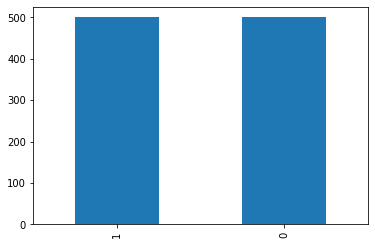

In [ ]:
import matplotlib.pyplot as plt 
df['Liked'].value_counts().plot(kind='bar')
df['Liked'].value_counts()

#DATA CLEANING #
Using stemming

In [ ]:
import re  # importing re that is Regular Expression
import nltk  # importing nltk that is Natural Language Toolkit
nltk.download('stopwords') #then we are downloading nltk's stopwords file, that has stopwords for 16 global language
#we are importing stopwords and PorterStemmer from nltk that we would use in the next cell.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#we are then filetring English language stopwords from our downloaded stopwords file and storing under this all_stopwords variable.
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#here we declare the Corpus variable for storing customer reviews post data cleaning.
corpus=[]
#we have this for loop here, that runs row by row 1000 times to clean every review that we have in our historic dump.
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i]) #dropping all special character and numbers.
  review = review.lower() #with this lower fuction, we are converting review to lower case,
  #with these next couples of lines, we are droppping all stop words, and stemming the leftovers.
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review) #appending every cleaned review to corpus

In [ ]:
#And this is how cleaned review looks like.
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [ ]:
df['Review'][50]

'We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.'

In [ ]:
df['Liked'][50]

1

##Dividing dataset into training and test set##

In [ ]:
x = df['Review'].values #inputs 
y = df['Liked'].values   #outputs 

In [ ]:
#Then we are spliting our dataset into tarining and test using train_test_split from sklearn into 80% training and 20% test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

(800,)

In [ ]:
x_test.shape

(200,)

##**Model fitting**##
Pipeline method

In [ ]:
#importing pipeline
from sklearn.pipeline import make_pipeline 
from sklearn.feature_extraction.text import CountVectorizer #importing CountVectorizer
from sklearn.svm import SVC                                #importing SVC
text_model = make_pipeline(CountVectorizer(),SVC())

text_model.fit(x_train,y_train) #fitting the model

y_pred = text_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1])

##To check the accuracy of the model
importing accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)  #here our accuracy of the model is 0.79

0.79

In [ ]:
y_pred #predicted output

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1])

In [ ]:
y_test #Actual output

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [ ]:
df1 = pd.DataFrame({'Actual Data':y_test,'Predicted Data': y_pred})
df1

,Actual Data,Predicted Data
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
195,0,0
196,1,1
197,1,1
198,0,0


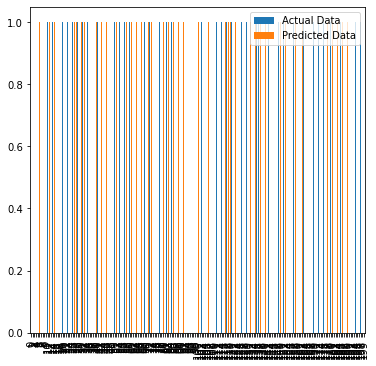

In [ ]:
#we create a dataframe with these two columns only for pandas plotting.
df1.plot(figsize=(6,6),kind='bar')
plt.show()

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


##Model performance
Testing oue model how well our model good review as good and bad reviews as bad

In [ ]:
test = df['Review'][12]
test

'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'

In [ ]:
df['Liked'][12] #for the statement which is there in index position 990, the statement is negative (0)
#lets see what our model thinks of this statement

0

In [ ]:
text_model.predict([df['Review'][12]]) #model is predicting that the above message is negative(0)

array([0])

In [ ]:
text_model.predict(['Not tasty and the texture was just nasty.']) 

array([0])

##Importing joblib 

In [ ]:
import joblib

In [ ]:
text_model.predict([df['Review'][12]])

array([0])

In [ ]:
joblib.dump(text_model,"model_joblib.pkl")

['model_joblib.pkl']

In [ ]:
classifier=joblib.load('model_joblib.pkl')

In [ ]:
classifier.predict([df['Review'][12]])

array([0])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[78 19]
 [23 80]]


##STREAMLIT APP FOR NLP
The quickest way to embed your models into web apps.

In [ ]:

text_model = joblib.load('model_joblib.pkl')

In [ ]:
!pip install streamlit --quiet #installing streamlit

     |████████████████████████████████| 9.1 MB 4.9 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 111 kB 46.4 MB/s 
     |████████████████████████████████| 4.3 MB 39.7 MB/s 
     |████████████████████████████████| 232 kB 59.7 MB/s 
     |████████████████████████████████| 181 kB 42.5 MB/s 
     |████████████████████████████████| 164 kB 49.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 131 kB 58.6 MB/s 
     |████████████████████████████████| 428 kB 20.4 MB/s 
     |████████████████████████████████| 131 kB 73.1 MB/s 
     |████████████████████████████████| 793 kB 50.8 MB/s 
     |████████████████████████████████| 381 kB 60.8 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.6.4 requi

In [ ]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15983 sha256=12bd68cb42fb21ab29f6bf2f7a6794b34d7562ee9b1d90b7d1df6cd498efbb56
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok #Ngrok is a cross-platform application that exposes local server ports to the Internet.

In [ ]:
%%writefile app.py 
import streamlit as st 
import joblib 
st.title("RESTAURANT REVIEW")
text_model = joblib.load('rest-review')
ip = st.text_input('Enter your message:')
op = text_model.predict([ip])
if st.button('Predict'):
  st.title(op[0])

Writing app.py


In [ ]:
!nohup streamlit run app.py & 
url = ngrok.connect(port = '8501') #Here the url for the web app
url

nohup: appending output to 'nohup.out'


'http://d944-34-75-155-146.ngrok.io'